# **Airline Passenger Satisfaction**








**Introducción**: Para cualquier compañía aérea es sumamente importante mantener una buena reputación y conocer la experiencia de los pasajeros con la finalidad de mejorar sus servicios, captar un mayor porcentaje del mercado y lograr la fidelización de sus clientes actuales.

En función de ello, tomaremos una base de datos de pasajeros del sitio https://www.kaggle.com/ en donde los mismos califican distintos aspectos de su experiencia.

Objetivo: A través del análisis de estos datos, se desea predecir si el cliente se encontrará satisfecho, neutral o insatisfecho por el servicio brindado de parte de la compañía aérea. Ello le permitirá a las aerolíneas prestar atención en aspectos críticos a la hora de brindar un buen servicio, retener y fidelizar clientes, como también atraer a nuevos clientes. Lo que redundará en mayores ganancias y un modelo de negocio sostenido en el tiempo.

Para lograr el objetivo propuesto realizaremos un “Modelo supervisado de Clasificación” el cual contemplará distintas variables que influyen en la experiencia del pasajero. Entre las mismas podemos mencionar: la edad del pasajero, su género, el motivo del viaje, la clase en la cual viaje, la distancia del vuelo en millas, los minutos de demora en arribos, los minutos de demora en partidas, el servicio de a bordo, entre otras.



#**Variables que analizaremos**

Gender: Género de los pasajeros (Female, Male)

Customer Type: Tipo de consumidor (Loyal customer, disloyal customer)

Age: Edad de los pasajeros

Type of Travel: Propósito del viaje (Personal Travel, Business Travel)

Class: Clase elegida (Business, Eco, Eco Plus)

Flight distance: Distancia del vuelo

Inflight wifi service: Nivel de satisfacción sobre el servicio de Wifi (0:Not Applicable;1-5)

Departure/Arrival time convenient: Nivel de satisfacción sobre Departure/Arrival time convenient (0:Not Applicable;1-5)

Ease of Online booking: Nivel de satisfacción sobre la reserva online (0:Not Applicable;1-5)

Gate location: Nivel de satisfacción sobre la ubicacion de la puerta de embarque (0:Not Applicable;1-5)

Food and drink: Nivel de satisfacción sobre el servicio de comidas y bebidas (0:Not Applicable;1-5)

Online boarding: Nivel de satisfacción sobre el servicio de embarque online (0:Not Applicable;1-5)

Seat comfort: Nivel de satisfacción sobre los asientos (0:Not Applicable;1-5)

Inflight entertainment: Nivel de satisfacción sobre el servicio de entretenimiento (0:Not Applicable;1-5)

On-board service: Nivel de satisfacción sobre el servicio a bordo (0:Not Applicable;1-5)

Leg room service: Nivel de satisfacción sobre el espacio para las piernes (0:Not Applicable;1-5)

Baggage handling: Nivel de satisfacción sobre el manejo del equipaje (0:Not Applicable;1-5)

Check-in service: Nivel de satisfacción sobre el servicio de check-in (0:Not Applicable;1-5)

Inflight service: Nivel de satisfacción sobre el servicio a bordo (0:Not Applicable;1-5)

Cleanliness: Nivel de satisfacción sobre la limpieza (0:Not Applicable;1-5)

Departure Delay in Minutes: Minutos de demora en la salida

Arrival Delay in Minutes: Minutos de demora en la llegada

Satisfaction: Nivel de satisfacción con la aerolinea (Satisfaction, neutral or dissatisfaction)

# **`EDA`**

En Primer lugar, llamaremos a las librerias necesarias para realizar el trabajo:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

En segundo lugar, leeremos la Base de Datos seleccionada:


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



df = pd.read_csv('/content/drive/MyDrive/Proyecto Final Facundo Deza/1. Satisfaccion de pasajeros.csv', sep=';')

df.head()

Mounted at /content/drive


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Una vez que pudimos leer la base, realizamos un análisis de sus datos


In [ ]:
df.shape

(129880, 24)

In [ ]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [ ]:
df.columns.unique()

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

En este paso, veremos las variables que según la base de datos seleccionada influyen en la satisfacción del pasajero:


In [ ]:
list(df.columns[1:24])

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

Por último, observaremos las variables que puede tomar la columna que intentaremos predecir a través de nuestro análisis:


In [ ]:
list(df.satisfaction.unique())

['neutral or dissatisfied', 'satisfied']

# **Observaciones sobre los de datos obtenidos**

En primer lugar, analizaremos el género de los viajeros:

In [ ]:
conteo_valores1 = df['Gender'].value_counts().to_frame().reset_index()
conteo_valores1 = conteo_valores1.rename(columns={'index': 'valor', 'Gender': 'cantidad'})
conteo_valores1 = conteo_valores1.sort_values('cantidad', ascending=False)

print(conteo_valores1)

    valor  cantidad
0  Female     65899
1    Male     63981


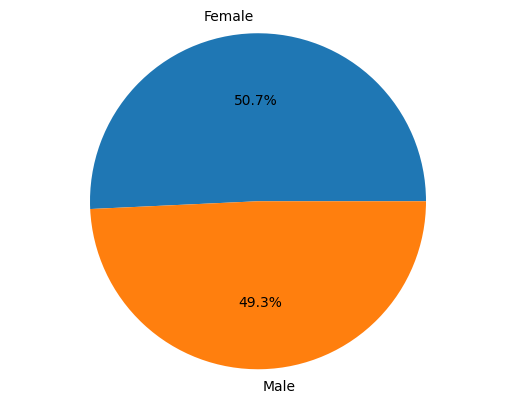

In [ ]:
plt.pie(conteo_valores1['cantidad'], labels=conteo_valores1['valor'], autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('grafico1.1.png')
plt.show()

Observamos que la cantidad de pasajeros hombres y mujeres son muy similares, con un pequeño predominio de las mujeres

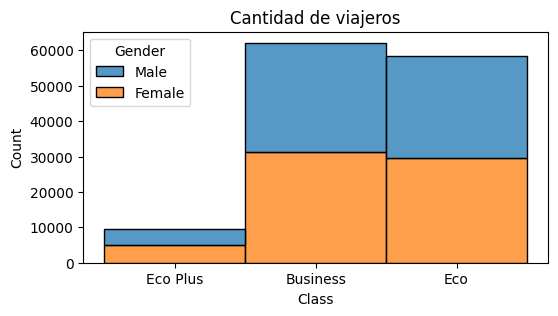

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
sns.histplot (data=df, x='Class', hue='Gender', multiple='stack')
ax.set_title('Cantidad de viajeros')
plt.savefig('grafico1.png')
plt.show()

Vemos en este gráfico cómo se reparten los pasajeros hombres y mujeres en las tres clases ofrecidas por las compañías aéreas (Eco Plus, Business y Eco).

Ahora buscaremos comprender cuál es el motivo de la mayoria de los viajes


In [ ]:
conteo_valores2 = df['Type of Travel'].value_counts().to_frame().reset_index()
conteo_valores2 = conteo_valores2.rename(columns={'index': 'valor', 'Type of Travel': 'cantidad'})
conteo_valores2 = conteo_valores2.sort_values('cantidad', ascending=False)

print(conteo_valores2)

             valor  cantidad
0  Business travel     89693
1  Personal Travel     40187


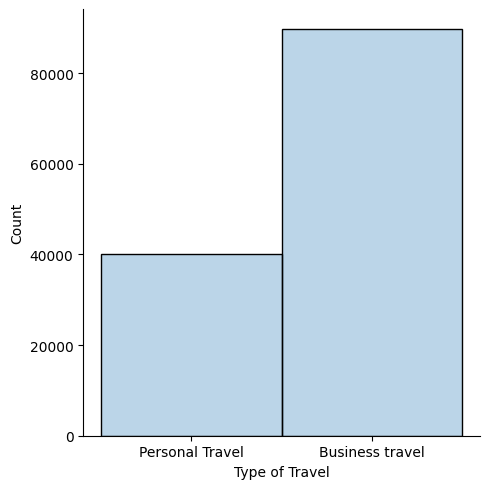

In [ ]:
sns.displot (data=df, x='Type of Travel', multiple='stack', alpha=0.3, legend=False)
plt.savefig('grafico2.png')
plt.show()

Observamos que la mayoría de los viajes se deben a negocios

En relación con esta observación y como fue mencionado anteriormente, notamos que la clase más utilizada por los viajeros es "Business"


In [ ]:
clase = df.groupby('Class').size()
clase

Class
Business    62160
Eco         58309
Eco Plus     9411
dtype: int64

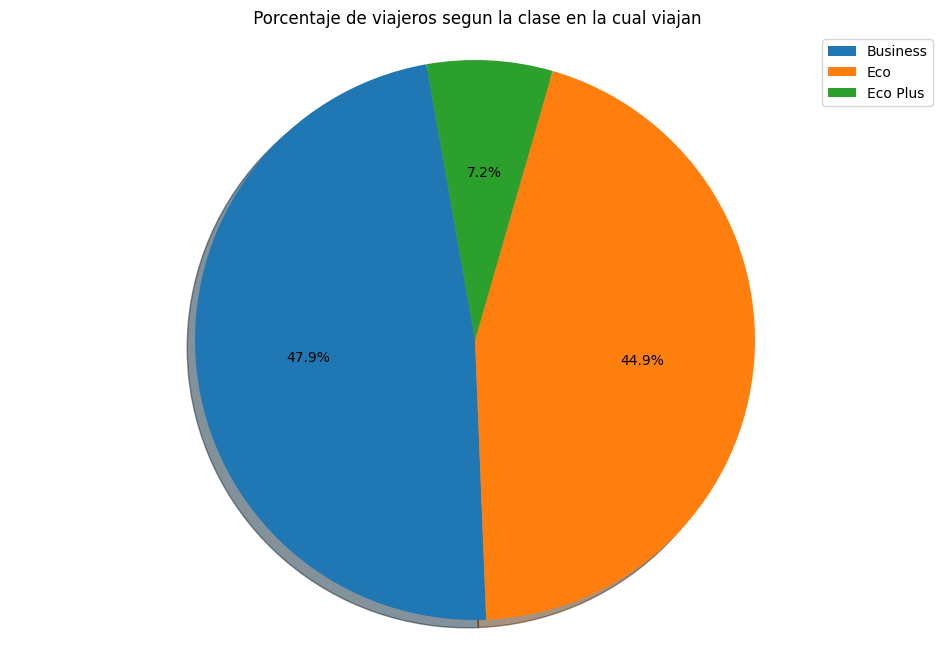

In [ ]:
labels= 'Business', 'Eco', 'Eco Plus'

fig, ax = plt.subplots(figsize=(12,8))
plt.pie(clase, autopct='%1.1f%%',
        shadow=True, startangle=100,)
ax.axis('equal')
plt.title("{} Porcentaje de viajeros segun la clase en la cual viajan".format(''))
plt.legend(labels)
plt.savefig('grafico3.png')
plt.show()

En este gráfico observamos cómo se reparte porcentualmente el total de viajeros en las distintas clases ofrecidas por las aerolíneas

En relación a la edad de los pasajeros, la mayoría se encuentran entre los 25 y los 44 años


In [ ]:
conteo_valores3 = df['Age'].value_counts().head()
print(conteo_valores3)

39    3692
25    3511
40    3209
44    3104
41    3089
Name: Age, dtype: int64


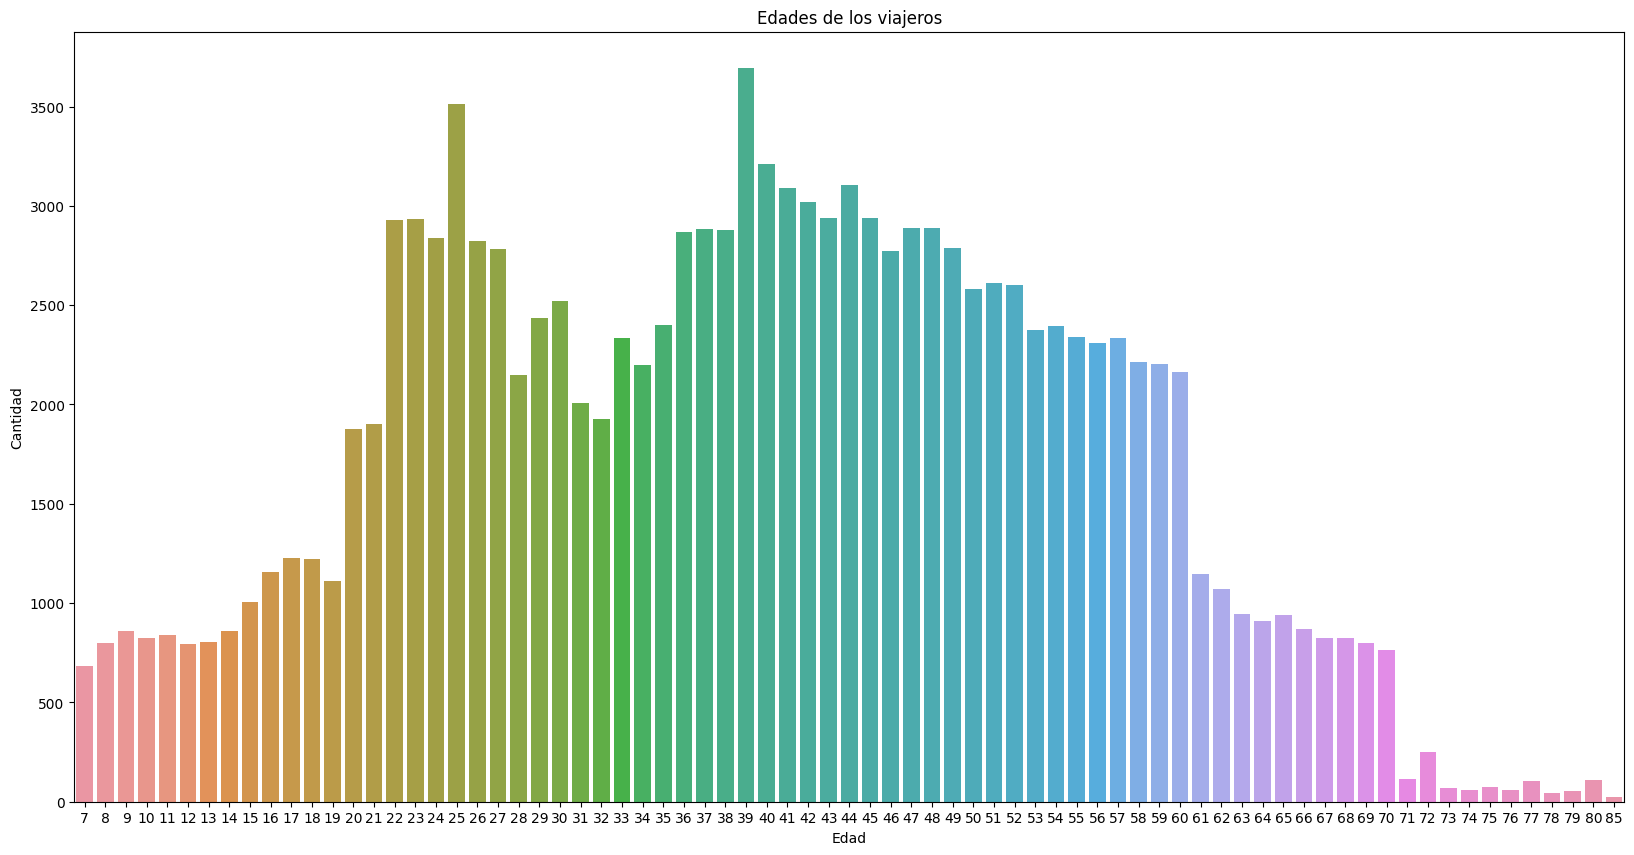

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(x="Age", data=df)
ax.set_title('Edades de los viajeros')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad')
plt.savefig('grafico4.png')
plt.show()

En este gráfico observamos la cantidad de viajeros según sus edades

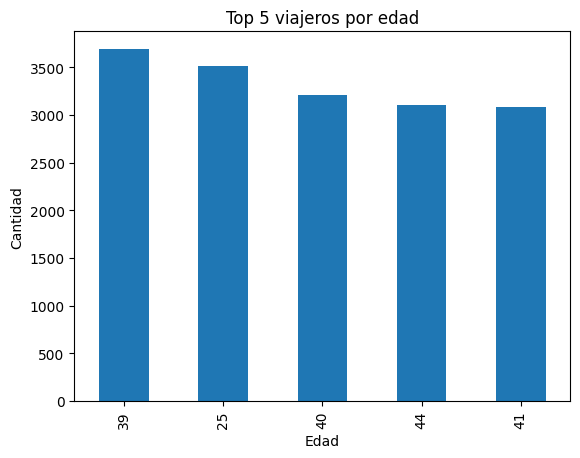

In [ ]:
conteo_valores3 = df['Age'].value_counts().head()
conteo_valores3.plot(kind='bar')
grafico = conteo_valores3.plot(kind='bar')
grafico.set_xlabel('Edad')
grafico.set_ylabel('Cantidad')
grafico.set_title('Top 5 viajeros por edad')
plt.savefig('grafico5.png')
plt.show()


Aquí observamos las 5 edades más frecuentes en los viajeros

Creamos un nuevo DataFrame y eliminamos la columna "id" para realizar el análisis de correlación


In [ ]:
df2 = df.drop('id', axis=1)

In [ ]:
df2.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**Análisis de Correlación** (nos permite entender cómo las variables se relacionan entre sí y cómo influyen en la satisfacción del pasajero)


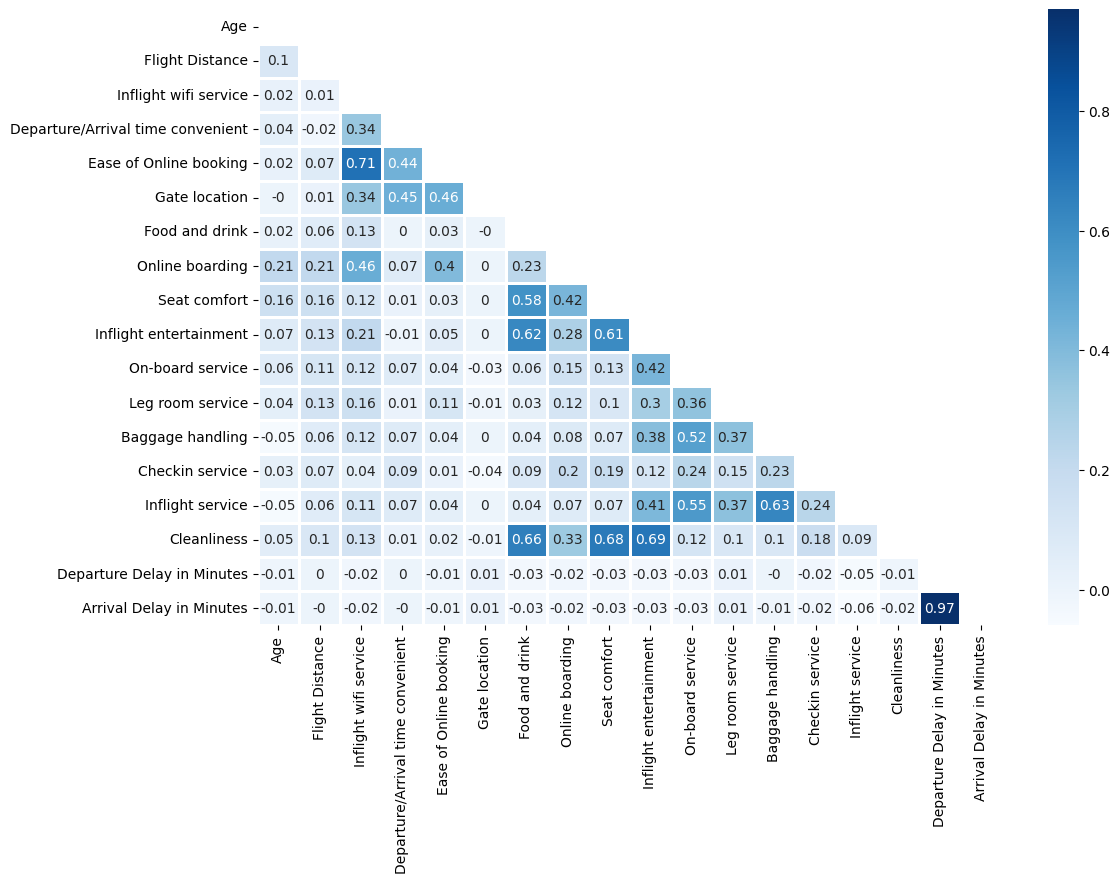

In [ ]:
plt.figure(figsize=(12, 8))

df2 = df2.corr().round(2)
mask = np.triu(np.ones_like(df2,dtype = bool))

sns.heatmap (df2, mask = mask, lw=1,
            xticklabels = df2.columns.values,
            yticklabels = df2.columns.values,
            annot = True,
            cmap = 'Blues')
plt.savefig('grafico6.png')
plt.show()

A través de esta gráfica, vamos a comprender mejor las relaciones entre las distintas variables

**Análisis de variables categóricas**(Lo realizamos a efectos de comprender la relación entre las variables categóricas y la satisfacción del pasajero.)

Dado que en su mayoria se trata  de clientes que viajan por negocios, sabemos que son personas que valoran mucho su tiempo y el mismo suele ser escaso. En base a ello, podemos observar que un horario de salida/llegada convenite, la facilidad a la hora de adquirir los tickets online, y el servicio de Wifi a bordo para poder continuar trabajando, se encuentran fuertemente relacionadas y se deben tomar en cuenta a la hora de brindar mayor satisfaccion al viajero.

1) "Ease of Online booking" e "Inflight wifi service"

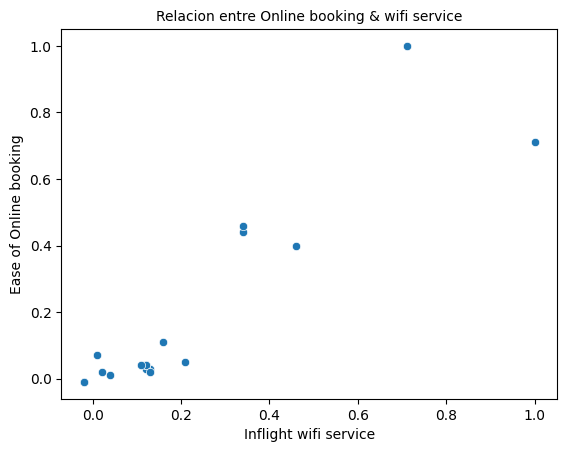

In [ ]:
sns.scatterplot(y="Ease of Online booking", x="Inflight wifi service", data=df2)
plt.title('Relacion entre Online booking & wifi service', fontsize = 10, fontweight = 10)
plt.savefig('grafico11.png')
plt.show()

2) Departure/Arrival time convenient y Ease of Online booking

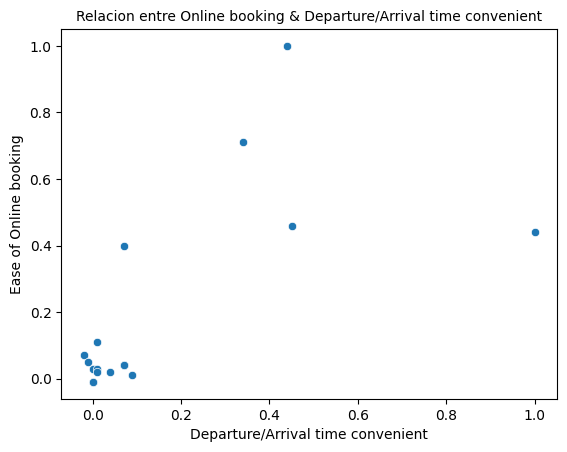

In [ ]:
sns.scatterplot(y="Ease of Online booking", x="Departure/Arrival time convenient", data=df2)
plt.title('Relacion entre Online booking & Departure/Arrival time convenient', fontsize = 10, fontweight = 10)
plt.savefig('grafico10.png')
plt.show()

3) "Departure/Arrival time convenient" y "Satisfaction" (Veremos el grado de satisfacción de los viajeros en relación al horario de llegada y salida de sus vuelos)

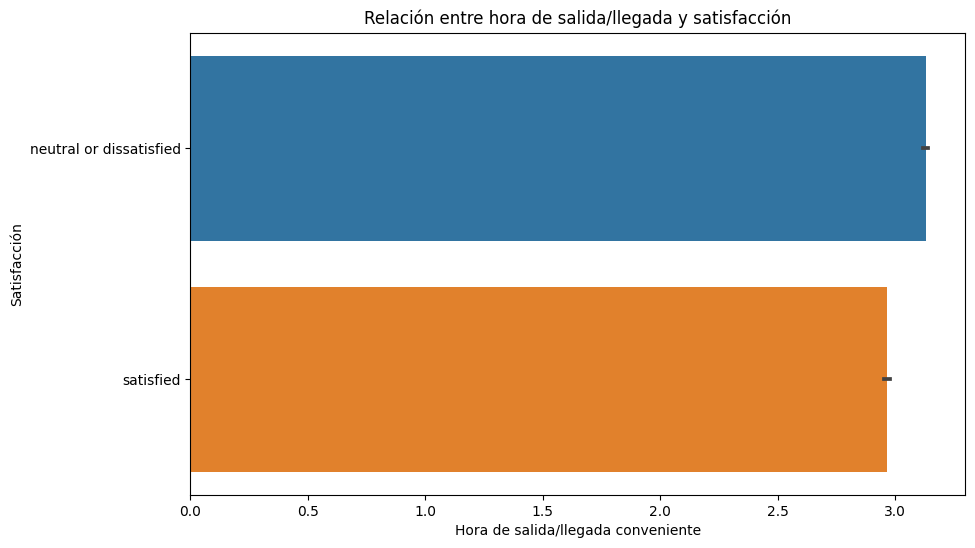

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Departure/Arrival time convenient', y='satisfaction', data=df)
ax.set_title('Relación entre hora de salida/llegada y satisfacción')
ax.set_xlabel('Hora de salida/llegada conveniente')
ax.set_ylabel('Satisfacción')
plt.savefig('grafico8.png')
plt.show()

4) Relación entre "Class" y "Satisfaction" (Veremos el grado de satisfacción de los viajeros en relación a la clase elegida)

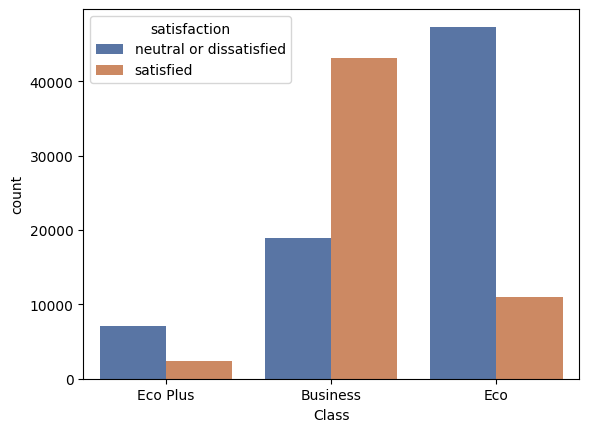

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "deep", data = df)
plt.savefig('grafico12.png')
plt.show()

**Análisis de variables numéricas** (Lo realizamos a los efectos de analizar la distribución de las variables numéricas y detectar posibles valores atípicos para su posterior estudio).





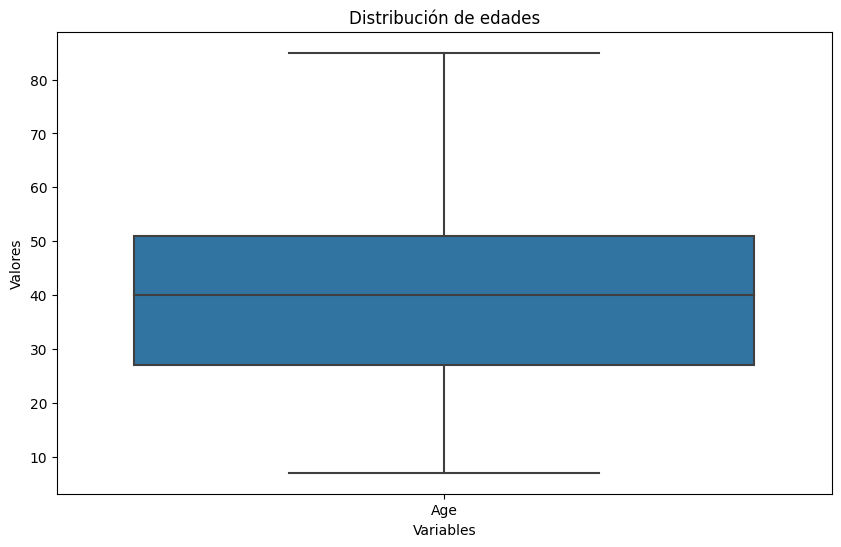

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[['Age']])
ax.set_title('Distribución de edades')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')
plt.savefig('grafico7.png')
plt.show()


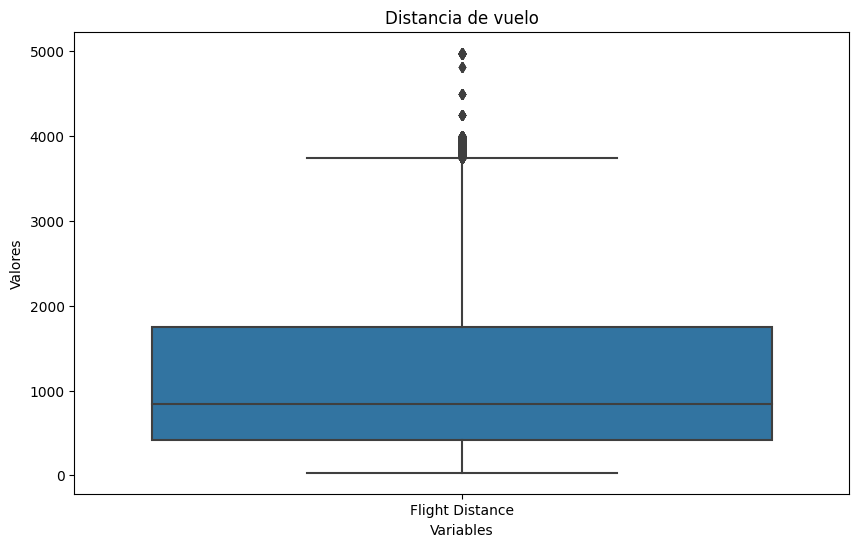

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[['Flight Distance']])
ax.set_title('Distancia de vuelo')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')
plt.savefig('grafico7.1.png')
plt.show()

**Análisis de la variable objetivo** (Lo realizamos para comprender la distribución de la variable objetivo, o sea, la satisfacción del pasajero).


In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

Ahora realizaremos su representación graficamente


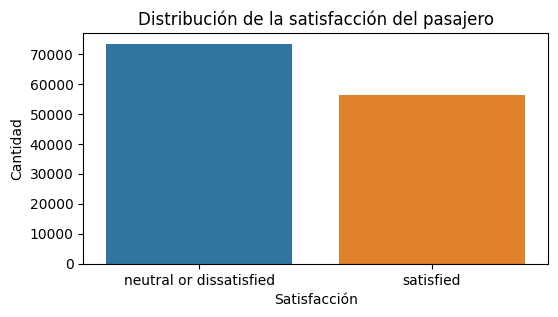

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
sns.countplot(data=df, x='satisfaction')
ax.set_title('Distribución de la satisfacción del pasajero')
ax.set_xlabel('Satisfacción')
ax.set_ylabel('Cantidad')
plt.savefig('grafico9.png')
plt.show()

En este gráfico observamos la cantidad de viajeros satisfechos e insatisfechos con el servicio brindado por la aerolinea

#**Conclusiones preliminares**

En base a las observaciones realizadas y la finalidad del Análisis que estamos llevando a cabo, se pueden realizar las siguientes recomendaciones a las aerolíneas a los fines de que puedan brindar una mejor experiencia a los usuarios:

1. Observamos que la cantidad de viajeros hombres y mujeres es similar, por lo cual deberían tenerlo en cuenta a la hora de brindar distintas series y películas en la categoría de "Inflight entertainment".

2. Observamos que la mayoría de los viajes se deben a negocios, por lo cual es importante que dentro de la categoría "Ease of Online booking" se tome en cuenta ello y se logre una interfaz amigable para las compras corporativas. Como así también se preste especial atención a los servicios brindados en la clase "Business" dado que es la más elegida.

3. Observamos que la mayoría de los viajeros comprenden entre los 25 y los 44 años, por lo cual se recomienda a las aerolíneas un estudio de mercado a los fines de conocer en mayor profundidad los gustos de las personas de ese rango etario tanto para la categoría de "Inflight entertainment" como la de "Food and drink".

4. En base al análisis de la variable categórica, vemos que la mayoría de los pasajeros no están satisfechos con el horario de llegada/salida. Por lo cual, las aerolíneas deberían trabajar sobre ello.

5. Observamos que gran parte de los pasajeros de la clase "Business" se encuentran satisfechos con el servicio, a diferencia de lo que pasa en el resto de las clases. Por lo cual, las compañías deberían buscar estrategias para aumentar la satisfacción de los pasajeros en las clases "Eco" y "Eco Plus"

6. En base al análisis de la variable objetivo, vemos que la mayoría de los viajeros calificó la experiencia como "Neutral or Dissatisfied", por cual las aerolíneas deben trabajar aún más sobre las variables que influyen en la satisfacción de los mismos, a los fines mejorar su experiencia y fidelizarlos.



#**Data Wrangling**

Al realizar el análisis EDA, identificamos que la columna "Arrival Delay in Minutes" posee valores nulos. A fin de no perder la información del resto de las columnas, utilizaremos la mediana para completar los valores nulos.


In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

A través de las siguientes 2 tablas, verificaremos que no hayan valores nulos



In [ ]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Figure size 800x600 with 0 Axes>

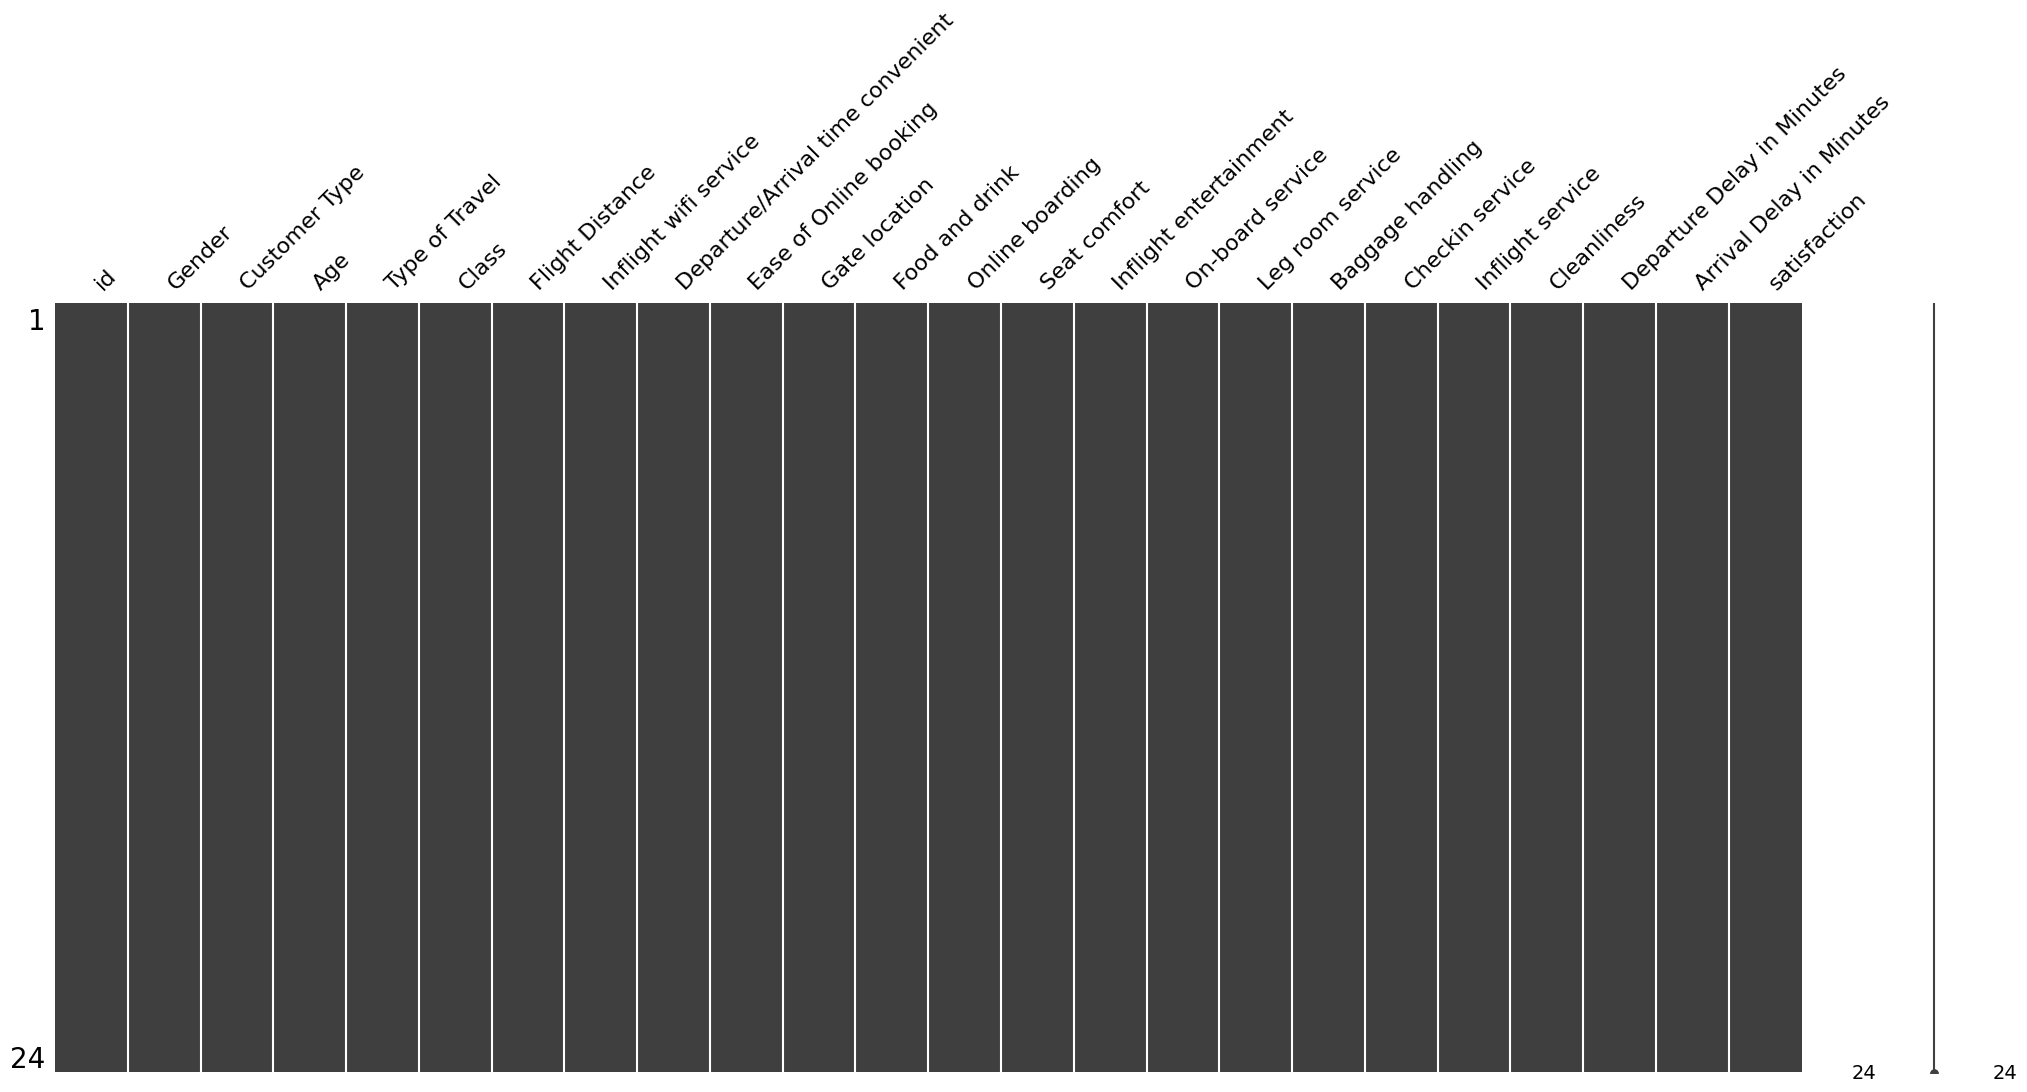

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 6))
msno.matrix(df.sample(24));

Por último, corroboramos graficamente que no poseemos valores nulos. En el siguiente gráfico, los valores no nulos se representan en negro y los valores nulos en blanco.

# **`Modelos`**

Para poder predecir el grado de satisfacción del pasajero (satisfecho, neutral o insatisfecho) acerca del servicio brindado de parte de la compañía aérea, realizaremos un “Modelo supervisado de Clasificación” el cual contemplará distintas variables que influyen en la experiencia del pasajero.

Transformamos las variables categoricas a formato numérico

In [ ]:
df_dummy = pd.get_dummies(df, drop_first=True)

Vericamos las columnas creadas

In [ ]:
print(df_dummy)

            id  Age  Flight Distance  Inflight wifi service  \
0        70172   13              460                      3   
1         5047   25              235                      3   
2       110028   26             1142                      2   
3        24026   25              562                      2   
4       119299   61              214                      3   
...        ...  ...              ...                    ...   
129875   78463   34              526                      3   
129876   71167   23              646                      4   
129877   37675   17              828                      2   
129878   90086   14             1127                      3   
129879   34799   42              264                      2   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                   

Eliminamos la columna 'id' para excluirla del análisis

In [ ]:
df_dummy = df_dummy.drop('id', axis=1)

Separamos en "X" e "Y". Donde "X" serán todas las columnas a excepción de 'satisfacción' (dado que es la que queremos predecir) e "Y" será nuestra columna de 'Satisfaction'

In [ ]:
X = df_dummy.drop(['satisfaction_satisfied'], axis=1)
y = df_dummy.satisfaction_satisfied

Separamos las columnas en "Train" y "Test"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#**`Modelo Random Forest`**

En primer lugar, evaluaremos el porcentaje de acierto sobre los datos de entrenamiento, y luego sobre los datos de prueba.

Para ello, realizaremos los siguientes pasos:
1) Llamamos al modelo /
2)Entrenamos el modelo utilizando los datos de entrenamiento /
3)Hacemos predicciones sobre los datos de prueba /
4)Calculamos la precisión del modelo



In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_train)
rf_accuracy = accuracy_score(y_train, rf_pred)
print("Precisión del modelo Random Forest (train accuracy): {:.2f}%".format(rf_accuracy * 100))

Precisión del modelo Random Forest (train accuracy): 100.00%


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Precisión del modelo Random Forest: {:.2f}%".format(rf_accuracy * 100))

Precisión del modelo Random Forest: 96.08%


#**`Modelo Random KNN`**

Realizaremos los mismos pasos que en el 'Modelo Random Forest' a los fines de conocer la precisión de este nuevo modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
knn_accuracy = accuracy_score(y_train, y_pred)
print("Precisión del modelo KNN (train accuracy):{:.2f}%".format(knn_accuracy * 100))

Precisión del modelo KNN (train accuracy):83.17%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:{:.2f}%".format(knn_accuracy * 100))

Precisión del modelo KNN:74.53%


#**`Modelo de Regresión Logística`**

Realizaremos los mismos pasos que en el 'Modelo Random Forest' a los fines de conocer la precisión de este nuevo modelo

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_train)
LogisticRegression_accuracy = accuracy_score(y_train, y_pred)
print("Precisión del modelo Logistic Regression (train accuracy):{:.2f}%".format(LogisticRegression_accuracy * 100))

Precisión del modelo Logistic Regression (train accuracy):83.74%


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
LogisticRegression_accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Regresión Logística:{:.2f}%".format(LogisticRegression_accuracy * 100))

Precisión del modelo de Regresión Logística:83.84%


Observamos en todos los modelos un porcentaje de acierto es similar en train y test, por lo cual suponemos que el modelo es capaz de generalizar bien ante datos no conocidos.

#***Resultados de cada modelo***



In [ ]:
print("Precisión del modelo Random Forest: {:.2f}%".format(rf_accuracy * 100))
print("Precisión del modelo KNN: {:.2f}%".format(knn_accuracy * 100))
print("Precisión del modelo Logistic Regression: {:.2f}%".format(LogisticRegression_accuracy * 100))

Precisión del modelo Random Forest: 96.08%
Precisión del modelo KNN: 74.53%
Precisión del modelo Logistic Regression: 83.84%


Destacamos que todos los modelos pueden predecir con alta certeza el grado de Satisfacción de los pasajeros, siendo el modelo Random Forest en el cual encontramos los mejores resultados.

#***Confusion Matrix***

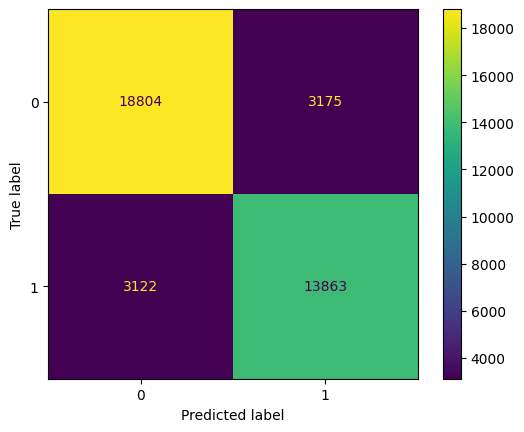

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)* 100:.2f}%")
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)* 100:.2f}%")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)* 100:.2f}%")

Precision Score of the classifier is: 81.37%
Recall Score of the classifier is: 81.62%
F1 Score of the classifier is: 81.49%


**Conclusión:**
Observamos un alto porcentaje de Precisión en el modelo, dado que cuando el mismo identifica que un pasajero estará satisfecho en el 80% de los casos ello es correcto.

Con respecto al Recall Score, el modelo no presenta dificultades para clasificar si el pasajero estará satisfecho o insatisfecho, dado que en el 80% de los casos su clasificación fue correcta.


#***Curva ROC***

AUC for our classifier is: 0.9933188011255372


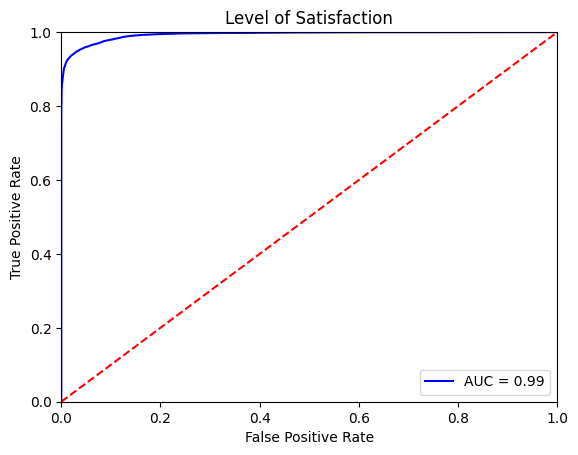

In [ ]:
Satisfaction = rf_model.predict_proba(X_test)
preds = Satisfaction[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Level of Satisfaction')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Cross Validation
Aplicaremos la técnica de **Stratified - k Fold** a los fines de ajustar el modelo y evitar el Overfitting.

Lo aplicaremos sobre el modelo de Random Forest debido a los buenos resultados obtenidos en el paso anterior

In [ ]:
data = df_dummy.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(129880, 23) (129880,)


In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [ ]:
train, test = list(skf.split(X, y))[0]
train

array([     0,      1,      2, ..., 129875, 129878, 129879])

In [ ]:
model = RandomForestClassifier(n_estimators=30, criterion="gini",max_depth=4)
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  train, test = list(skf.split(X, y))[i]
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  model.fit(X_train_n, y_train_n)
  pred= model.predict(X_test_n)
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy: {:.2f}%'.format(accuracy * 100))
  list_ac.append(accuracy)
print('Accuracy promedio: {:.2f}%'.format(np.mean(list_ac) * 100))

Iteracion:  1  Accuracy: 90.41%
Iteracion:  2  Accuracy: 91.46%
Iteracion:  3  Accuracy: 89.88%
Iteracion:  4  Accuracy: 90.55%
Iteracion:  5  Accuracy: 90.62%
Accuracy promedio: 90.58%


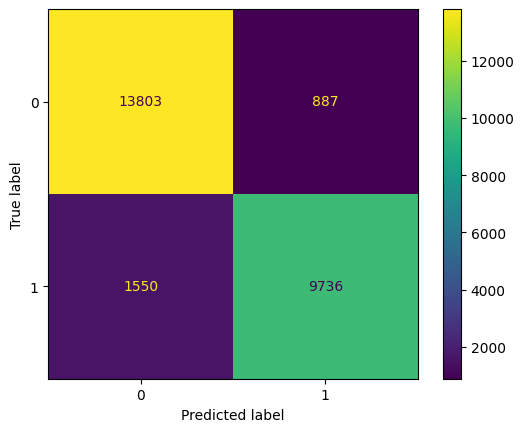

In [ ]:
cm = confusion_matrix(y_test_n, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(f"Precision Score of the classifier is: {precision_score(y_test_n, pred)* 100:.2f}%")
print(f"Recall Score of the classifier is: {recall_score(y_test_n, pred)* 100:.2f}%")
print(f"F1 Score of the classifier is: {f1_score(y_test_n, pred)* 100:.2f}%")

Precision Score of the classifier is: 91.65%
Recall Score of the classifier is: 86.27%
F1 Score of the classifier is: 88.88%


**Conclusión preliminar**

Si bien observamos en un primer momento que la exactitud del modelo Ramdom Forest disminuye del 96% al 90% luego de aplicar la técnica de Cross Validation **Stratified - k Fold**, al realizar nuevamente la matriz de confusión observamos los siguientes resultados:

* Mejora el porcentaje de Precisión en el modelo, elevando el porcentaje de precisión del 80% al 90%
Esto significa mejor porcentaje de acierto para los casos que el modelo identifica un pasajero satisfecho.

* Mejora el Recall Score, elevando el porcentaje del 80% inicial hasta el 86%
Esto significa una mejora considerable del modelo a la hora de clasificar si el pasajero estará satisfecho o insatisfecho.

#**Conclusión**

Luego de realizado el modelado y aplicadas las técnicas de Cross Validation, podemos concluir en que el modelo posee un alto grado de confiabilidad a la hora de determinar si un pasajero estará satisfecho o no por el servicio ofrecido por la compañía aerea.

La aplicación de este modelo sería de gran ayuda para que las aerolíneas puedan trabajar sobre aquellos factores que influyen en la satisfacción del pasajero, a los fines de obtener nuevos clientes y fidelizar a los actuales, permitiéndoles incrementar sus ganancias y haciendo su negocio sostenible en el tiempo.